In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
import csv
import itertools
from datetime import datetime

list_rows = []
list_rows_with_data = []

format_string = '%m/%d/%Y %I:%M:%S %p'

with open('dataset/Export_Time.csv', newline='\n') as csvfile:
    csvreader = csv.DictReader(csvfile, delimiter=',')
    for i,row in enumerate(csvreader):
        filters = row.get('Point Path').split('\\')
        row.pop('Point Path')
        row.pop('Process Value')
        row.pop('Unit')
        row.pop('Channel')
        row.pop('Detection')
        if row.get('Samples') == '0' or row.get('Data') == None or filters[7] == '7AO' or filters[7] == '8AO'or filters[7] == '7Hac'or filters[7] == '8Hac':
            list_rows_with_data.append(row)
        elif filters[6] == 'CONTRAEJE' and (filters[7] == '7AV' or filters[7] == '7HV' or filters[7] == '7VV' or filters[7] == '8AV' or filters[7] == '8HV' or filters[7] == '8VV') :
            row['DTS_new'] = datetime.strptime(row.pop('DTS'), format_string)
            row['point'] =  filters[7]
            data = [row.pop('Data')]
            row['newData'] = row.pop(None)
            row['newData'] = list(itertools.chain(data, row['newData']))
            list_rows.append(row)

In [4]:
len(list_rows)

310

In [3]:
one_list = list_rows[0]
one_list

{'Samples': '8192',
 'Max Time': '4.000',
 'Speed (Hz)': '2.833',
 'DTS_new': datetime.datetime(2024, 6, 24, 10, 36, 20),
 'point': '7HV',
 'newData': ['0.223720',
  '-0.143025',
  '-0.077838',
  '0.205531',
  '0.052949',
  '0.045915',
  '0.123279',
  '-0.068379',
  '-0.056694',
  '0.171697',
  '0.082016',
  '0.051393',
  '0.177392',
  '-0.076734',
  '-0.169056',
  '0.200566',
  '0.178495',
  '-0.025342',
  '0.107042',
  '-0.072833',
  '-0.240667',
  '0.111574',
  '0.177943',
  '-0.085878',
  '0.107535',
  '0.132324',
  '-0.179993',
  '-0.147537',
  '0.108993',
  '0.064241',
  '0.163814',
  '0.122590',
  '-0.193018',
  '-0.110983',
  '0.158139',
  '0.037500',
  '0.024002',
  '0.162967',
  '-0.007409',
  '-0.143084',
  '0.066527',
  '0.144345',
  '0.093800',
  '0.120777',
  '-0.001636',
  '-0.139576',
  '0.196802',
  '0.192388',
  '-0.188663',
  '0.382568',
  '-0.079769',
  '-0.419320',
  '0.274620',
  '0.295981',
  '-0.233632',
  '0.038663',
  '0.104401',
  '-0.198004',
  '0.021105',
 

In [156]:
y = np.array([float(item) for item in one_list.get('newData')])

In [157]:
x = np.linspace(0,float(one_list.get('Max Time')),len(one_list.get('newData')))

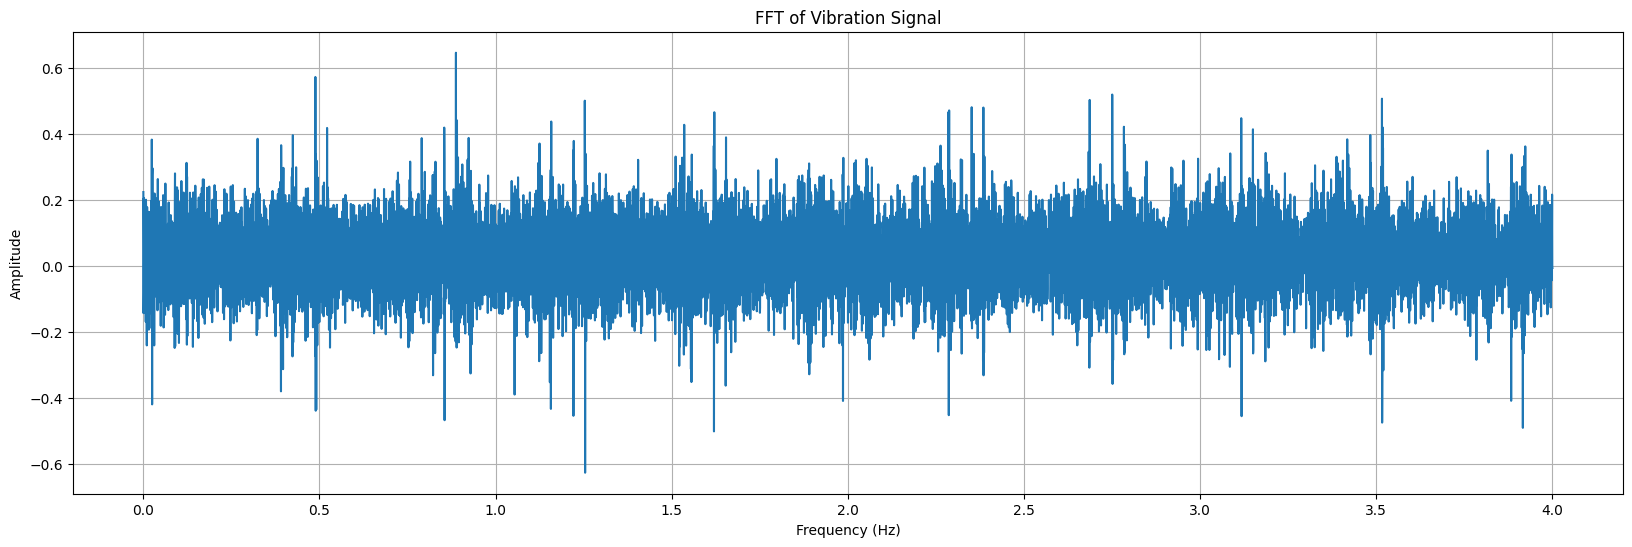

In [158]:
plt.figure(figsize=(20,6))
plt.plot(x,y)
plt.title('FFT of Vibration Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [159]:
def get_sample(x,y,n):
    x_sample = x[0:n]
    y_sample = y[0:n]
    return x_sample,y_sample


In [160]:
x_sample,y_sample=get_sample(x,y,100)

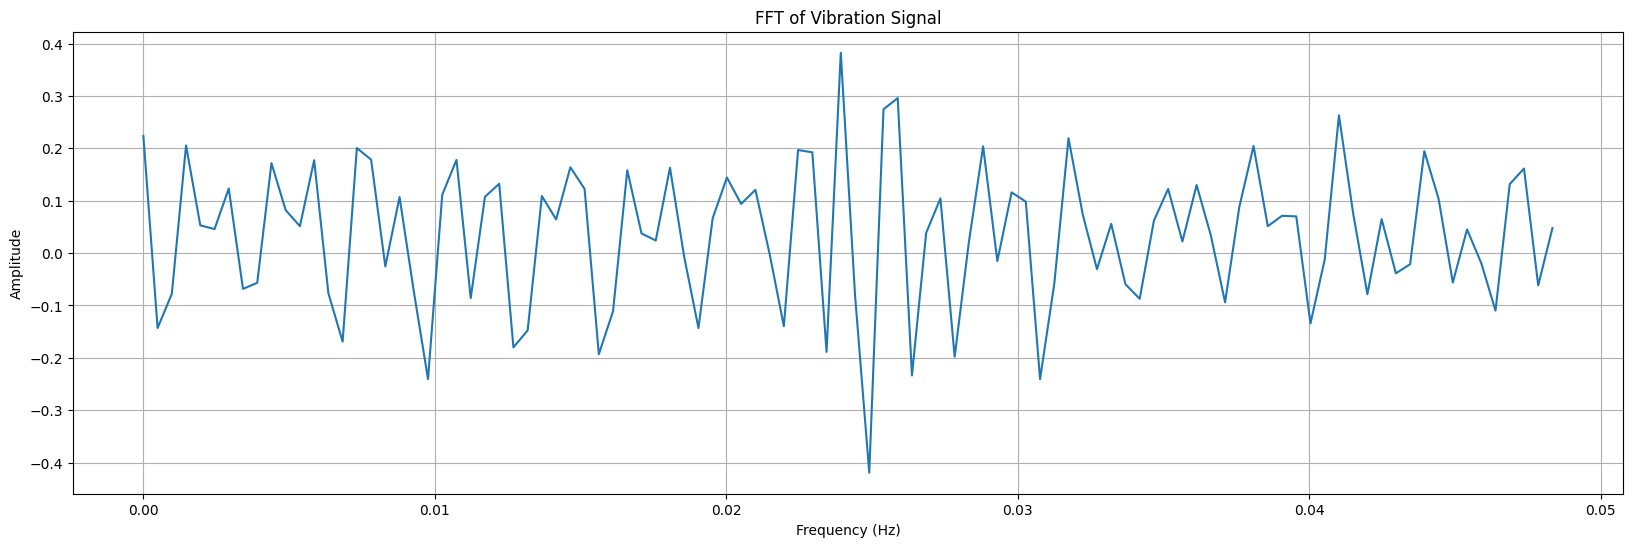

In [161]:
plt.figure(figsize=(20,6))
plt.plot(x_sample,y_sample)
plt.title('FFT of Vibration Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [162]:
from scipy.fft import fft, fftfreq

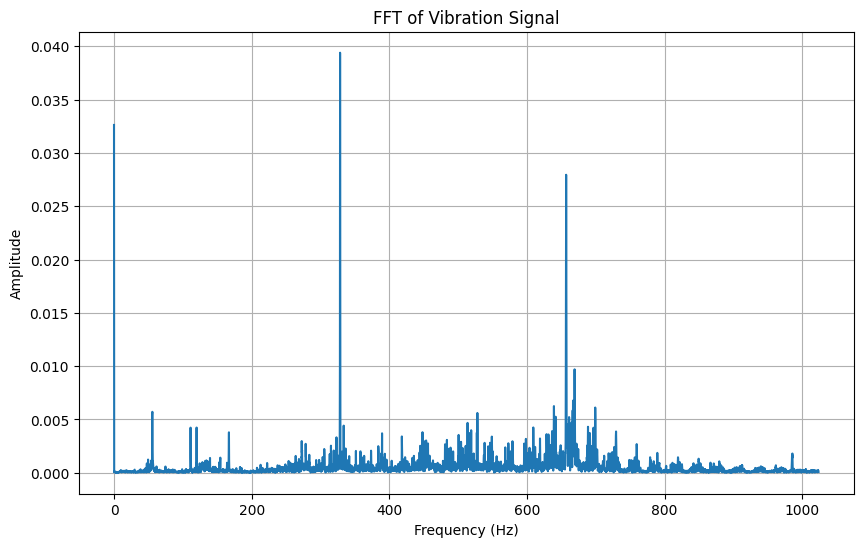

In [163]:
N = len(x)
sampling_freq = 1 / (x[1]-x[0])

amplitude_fft = fft(y)
freq = fftfreq(N, d = 1/sampling_freq)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(freq[:N//2], np.abs(amplitude_fft)[:N//2] * 1/N)
plt.title('FFT of Vibration Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [164]:
list_rows

[{'Samples': '8192',
  'Max Time': '4.000',
  'Speed (Hz)': '2.833',
  'DTS_new': datetime.datetime(2024, 6, 24, 10, 36, 20),
  'point': '7HV',
  'newData': ['0.223720',
   '-0.143025',
   '-0.077838',
   '0.205531',
   '0.052949',
   '0.045915',
   '0.123279',
   '-0.068379',
   '-0.056694',
   '0.171697',
   '0.082016',
   '0.051393',
   '0.177392',
   '-0.076734',
   '-0.169056',
   '0.200566',
   '0.178495',
   '-0.025342',
   '0.107042',
   '-0.072833',
   '-0.240667',
   '0.111574',
   '0.177943',
   '-0.085878',
   '0.107535',
   '0.132324',
   '-0.179993',
   '-0.147537',
   '0.108993',
   '0.064241',
   '0.163814',
   '0.122590',
   '-0.193018',
   '-0.110983',
   '0.158139',
   '0.037500',
   '0.024002',
   '0.162967',
   '-0.007409',
   '-0.143084',
   '0.066527',
   '0.144345',
   '0.093800',
   '0.120777',
   '-0.001636',
   '-0.139576',
   '0.196802',
   '0.192388',
   '-0.188663',
   '0.382568',
   '-0.079769',
   '-0.419320',
   '0.274620',
   '0.295981',
   '-0.233632'

In [165]:
new_list_rows = []
samples = []
list_rows_2 = list_rows.copy()
for item in list_rows_2:
    samples = item.pop('newData')
    for i,sample in enumerate(samples):
        if i <= 8192:
            item['data'] = float(sample)
            new_list_rows.append(item.copy())

In [166]:
new_list_rows

[{'Samples': '8192',
  'Max Time': '4.000',
  'Speed (Hz)': '2.833',
  'DTS_new': datetime.datetime(2024, 6, 24, 10, 36, 20),
  'point': '7HV',
  'data': 0.22372},
 {'Samples': '8192',
  'Max Time': '4.000',
  'Speed (Hz)': '2.833',
  'DTS_new': datetime.datetime(2024, 6, 24, 10, 36, 20),
  'point': '7HV',
  'data': -0.143025},
 {'Samples': '8192',
  'Max Time': '4.000',
  'Speed (Hz)': '2.833',
  'DTS_new': datetime.datetime(2024, 6, 24, 10, 36, 20),
  'point': '7HV',
  'data': -0.077838},
 {'Samples': '8192',
  'Max Time': '4.000',
  'Speed (Hz)': '2.833',
  'DTS_new': datetime.datetime(2024, 6, 24, 10, 36, 20),
  'point': '7HV',
  'data': 0.205531},
 {'Samples': '8192',
  'Max Time': '4.000',
  'Speed (Hz)': '2.833',
  'DTS_new': datetime.datetime(2024, 6, 24, 10, 36, 20),
  'point': '7HV',
  'data': 0.052949},
 {'Samples': '8192',
  'Max Time': '4.000',
  'Speed (Hz)': '2.833',
  'DTS_new': datetime.datetime(2024, 6, 24, 10, 36, 20),
  'point': '7HV',
  'data': 0.045915},
 {'Sample

In [167]:
len(new_list_rows)

2539520

In [168]:
data = pd.DataFrame(new_list_rows)

In [169]:
df = data.copy()

In [170]:
df['DTS_new'] = df['DTS_new'].dt.date

In [171]:
df['Samples'].unique()

array(['8192'], dtype=object)

In [172]:
df.head()

Samples Max Time Speed (Hz)     DTS_new point      data
0    8192    4.000      2.833  2024-06-24   7HV  0.223720
1    8192    4.000      2.833  2024-06-24   7HV -0.143025
2    8192    4.000      2.833  2024-06-24   7HV -0.077838
3    8192    4.000      2.833  2024-06-24   7HV  0.205531
4    8192    4.000      2.833  2024-06-24   7HV  0.052949

In [173]:
df.groupby(['DTS_new','point']).count()

Samples  Max Time  Speed (Hz)  data
DTS_new    point                                     
2023-07-10 7AV       8192      8192        8192  8192
           7HV       8192      8192        8192  8192
           7VV       8192      8192        8192  8192
           8AV       8192      8192        8192  8192
           8HV       8192      8192        8192  8192
...                   ...       ...         ...   ...
2024-06-24 7HV       8192      8192        8192  8192
           7VV       8192      8192        8192  8192
           8AV       8192      8192        8192  8192
           8HV       8192      8192        8192  8192
           8VV       8192      8192        8192  8192

[300 rows x 4 columns]

In [174]:
df['index'] = df.groupby(['DTS_new','point']).cumcount()

In [175]:
df.columns

Index(['Samples', 'Max Time', 'Speed (Hz)', 'DTS_new', 'point', 'data',
       'index'],
      dtype='object')

In [176]:
df.dtypes

Samples        object
Max Time       object
Speed (Hz)     object
DTS_new        object
point          object
data          float64
index           int64
dtype: object

In [177]:
f_pivoted = df.pivot(index=['index','DTS_new'], columns=['point'], values='data')

In [178]:
f_pivoted_shaped = f_pivoted.reset_index(drop=False)

In [179]:
f_pivoted_shaped

point   index     DTS_new       7AV       7HV       7VV       8AV       8HV  \
0           0  2023-07-10  0.047255  0.033524 -0.195949 -0.162843  0.091779   
1           0  2023-07-17 -0.100398  0.100189  0.297111  0.011591  0.136831   
2           0  2023-07-25  0.147853 -0.035736 -0.014335  0.228288  0.651255   
3           0  2023-08-01 -0.288506 -0.024096 -0.293891  0.038621 -0.031308   
4           0  2023-08-07  0.128989  0.146440 -0.048842  0.260582 -0.287600   
...       ...         ...       ...       ...       ...       ...       ...   
434171  16382  2023-10-16  0.013240 -0.040783  0.035367 -0.046918  0.215374   
434172  16382  2024-02-25 -0.181381  0.219970  0.114504       NaN       NaN   
434173  16383  2023-09-22       NaN  0.264178       NaN       NaN       NaN   
434174  16383  2023-10-16 -0.221060 -0.003442 -0.032604 -0.136760  0.059567   
434175  16383  2024-02-25 -0.111703  0.030923 -0.136138       NaN       NaN   

point        8VV  
0       0.185118  
1       0.083154  
2       0.047176  
3      -0.182073  
4      -0.066639  
...          ...  
434171 -0.031968  
434172       NaN  
434173       NaN  
434174  0.031855  
434175       NaN  

[434176 rows x 8 columns]

In [180]:
f_pivoted_shaped.sort_values(by=['DTS_new','index'],ascending=[True,True], inplace=True)

In [181]:
data.to_csv('dataset/pinnion_data.csv')

In [182]:
f_pivoted_shaped.to_csv('dataset/pinnion_data_shaped.csv')

In [183]:
f_pivoted_shaped.head()

point  index     DTS_new       7AV       7HV       7VV       8AV       8HV  \
0          0  2023-07-10  0.047255  0.033524 -0.195949 -0.162843  0.091779   
50         1  2023-07-10  0.211883  0.239935 -0.207795 -0.058516 -0.042462   
100        2  2023-07-10  0.203514 -0.228326 -0.100460  0.091065 -0.066554   
150        3  2023-07-10 -0.108794 -0.150506  0.141770  0.078930 -0.097827   
200        4  2023-07-10 -0.237849 -0.014269  0.135136 -0.033591 -0.072099   

point       8VV  
0      0.185118  
50    -0.056054  
100   -0.159153  
150   -0.197298  
200   -0.046711

In [184]:
f_pivoted_shaped.columns

Index(['index', 'DTS_new', '7AV', '7HV', '7VV', '8AV', '8HV', '8VV'], dtype='object', name='point')

In [185]:
f_pivoted_shaped_good = f_pivoted_shaped.loc[:,['index', 'DTS_new', '7AV', '7HV', '7VV']].copy()

In [186]:
f_pivoted_shaped_good = f_pivoted_shaped_good.rename(columns={'index':'index', 'DTS_new':'DTS_new', '7AV':'AV', '7HV':'HV', '7VV':'VV'})

In [187]:
f_pivoted_shaped_good['y'] = True

In [188]:
f_pivoted_shaped_good.head()

point  index     DTS_new        AV        HV        VV     y
0          0  2023-07-10  0.047255  0.033524 -0.195949  True
50         1  2023-07-10  0.211883  0.239935 -0.207795  True
100        2  2023-07-10  0.203514 -0.228326 -0.100460  True
150        3  2023-07-10 -0.108794 -0.150506  0.141770  True
200        4  2023-07-10 -0.237849 -0.014269  0.135136  True

In [189]:
f_pivoted_shaped_bad = f_pivoted_shaped.loc[:,['index', 'DTS_new', '8AV', '8HV', '8VV']].copy()

In [190]:
f_pivoted_shaped_bad = f_pivoted_shaped_bad.rename(columns={'index':'index', 'DTS_new':'DTS_new', '8AV':'AV', '8HV':'HV', '8VV':'VV'})

In [191]:
f_pivoted_shaped_bad['y'] = False

In [192]:
f_pivoted_shaped_bad.head()

point  index     DTS_new        AV        HV        VV      y
0          0  2023-07-10 -0.162843  0.091779  0.185118  False
50         1  2023-07-10 -0.058516 -0.042462 -0.056054  False
100        2  2023-07-10  0.091065 -0.066554 -0.159153  False
150        3  2023-07-10  0.078930 -0.097827 -0.197298  False
200        4  2023-07-10 -0.033591 -0.072099 -0.046711  False

In [193]:
data_ult = pd.concat([f_pivoted_shaped_good,f_pivoted_shaped_bad])

In [194]:
data_ult.head()

point  index     DTS_new        AV        HV        VV     y
0          0  2023-07-10  0.047255  0.033524 -0.195949  True
50         1  2023-07-10  0.211883  0.239935 -0.207795  True
100        2  2023-07-10  0.203514 -0.228326 -0.100460  True
150        3  2023-07-10 -0.108794 -0.150506  0.141770  True
200        4  2023-07-10 -0.237849 -0.014269  0.135136  True

In [195]:
data_ult.to_csv('dataset/data_pinion_process.csv')